In [5]:
import json
import numpy as np
import pandas as pd

In [6]:
def read_json(filename):    
    with open(filename, 'r') as openfile:
        return json.load(openfile)

In [7]:
index_to_token              = read_json('4_index_to_token_black_clover.json')
token_to_index              = read_json('4_token_to_index_black_clover.json')
index_to_character          = read_json('4_index_to_character_black_clover.json')
character_to_index          = read_json('4_character_to_index_black_clover.json')
hot_encoded_sentences       = np.array(read_json('4_hot_encoded_sentences_black_clover.json'))
count_vectorized_sentences  = np.array(read_json('4_count_vectorized_sentences_black_clover.json'))

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [10]:
#X = StandardScaler().fit_transform(count_vectorized)
X = count_vectorized_sentences
df = pd.DataFrame(X)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,5144,5145,5146,5147,5148,5149,5150,5151,5152,5153
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
pca = PCA()
_ = pca.fit_transform(df)
PC_components = np.arange(pca.n_components_)+1

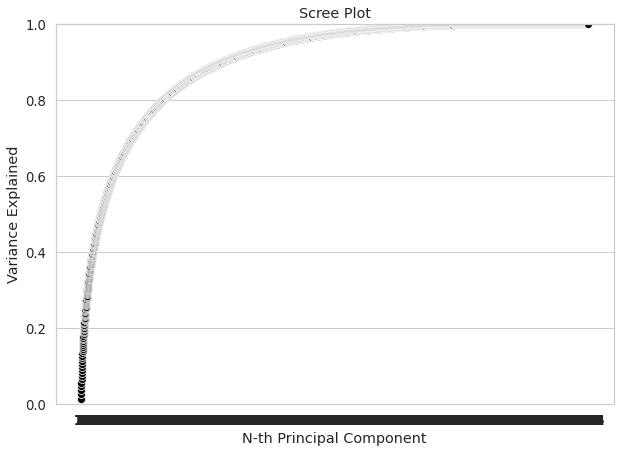

In [12]:
_ = sns.set(style='whitegrid', font_scale=1.2)
fig, ax = plt.subplots(figsize=(10, 7))
_ = sns.barplot(x=PC_components, y=pca.explained_variance_ratio_, color='b')
_ = sns.lineplot(x=PC_components-1, y=np.cumsum(pca.explained_variance_ratio_), color='black', linestyle='-', linewidth=2, marker='o', markersize=8)

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

In [13]:
pca = PCA(n_components=2)
pca_array = pca.fit_transform(df)

df_pca = pd.DataFrame(data=pca_array)
df_pca.columns = ['PC' + str(col+1) for col in df_pca.columns.values]

df_pca.head()

,PC1,PC2
0,-0.244068,-0.070993
1,0.651151,-0.376172
2,-0.076694,0.027803
3,-0.164898,-0.091495
4,-0.271478,-0.045699


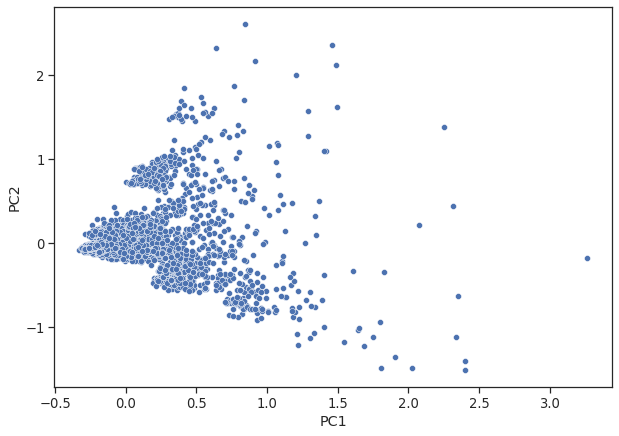

In [14]:
_ = sns.set(style='ticks', font_scale=1.2)
fig, ax = plt.subplots(figsize=(10, 7))
_ = sns.scatterplot(data=df_pca, x='PC1', y='PC2')